In [60]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [2]:
# Importing with reset index

products = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='products', header=0)
products.reset_index(inplace=True) # we are creating an index column because, in this particular sales dataset, no value is necessarily unique, except for the index
products=products.rename(columns={"index": "index_col"}) # we need to change the name of the column to something else

stock = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='stock', header=0)
stock.reset_index(inplace=True) 
stock=stock.rename(columns={"index": "index_col"}) 

assessment = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='assessment', header=0)
assessment.reset_index(inplace=True) 
assessment=assessment.rename(columns={"index": "index_col"}) 

invoices = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='invoices', header=0)
invoices.reset_index(inplace=True) 
invoices=invoices.rename(columns={"index": "index_col"}) 

customers = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='customers', header=0)
customers.reset_index(inplace=True) 
customers=customers.rename(columns={"index": "index_col"}) 



In [41]:
# Checking import dataset by sheets
products.head(20)
stock.head(10)
assessment.head(10)
invoices.head(10)
customers.head(10)


,index_col,CustomerID,Country
0,0,18011,Germany
1,1,18011,Germany
2,2,18011,Germany
3,3,18011,Germany
4,4,18011,Germany
5,5,18011,Germany
6,6,18011,Germany
7,7,13576,Germany
8,8,15235,Germany
9,9,16835,Germany


In [42]:
#Merging datasets

part_df=pd.merge(products, stock, on="index_col")
part_df=part_df.drop(['ASIN_y'], axis=1)

part2_df=pd.merge(part_df, assessment, on="index_col")
part2_df=part2_df.drop(['ASIN_x'], axis=1)

part3_df=pd.merge(part2_df, invoices, on="index_col")
part3_df=part3_df.drop(['ASIN_y'], axis=1)

full_df=pd.merge(part3_df, customers, on="index_col")
full_df=full_df.drop(['CustomerID_y', 'index_col'], axis=1)


In [43]:
# Database Info and shape

full_df.info()

full_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 554417 entries, 0 to 554416
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         554417 non-null  object        
 1   product_type  554417 non-null  object        
 2   StockCode     554417 non-null  object        
 3   rating        554417 non-null  float64       
 4   review_count  554417 non-null  int64         
 5   ASIN_x        554417 non-null  object        
 6   InvoiceNo     554417 non-null  object        
 7   Quantity      554417 non-null  int64         
 8   price         554417 non-null  float64       
 9   total_sale    554417 non-null  float64       
 10  invoice_date  554417 non-null  datetime64[ns]
 11  invoice_time  554417 non-null  int64         
 12  CustomerID_x  554417 non-null  object        
 13  Country       554417 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 

,title,product_type,StockCode,rating,review_count,ASIN_x,InvoiceNo,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID_x,Country
0,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,B07GWKDLGT,78536597,4,496.95,1987.80,2018-12-01,17,18011,Germany
1,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,B01MTLH408,78536597,4,39.99,159.96,2018-12-01,17,18011,Germany
2,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,B0064FS7HI,78536597,1,12.99,12.99,2018-12-01,17,18011,Germany
3,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,B013JHU5YG,78536597,1,199.99,199.99,2018-12-01,17,18011,Germany
4,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,B06XWN9Q99,78536597,1,7.49,7.49,2018-12-01,17,18011,Germany


In [ ]:
# Checking missing values

full_df.isnull().sum().sort_values(ascending=False)

In [44]:
#Making a copy  of dataset
df_rest=full_df.copy()

In [45]:
#Convert time and date into timestamp objects 
t= df_rest['invoice_time']
df_rest['invoice_time'] = pd.to_datetime(t, format='%H').dt.time

d = df_rest['invoice_date']
df_rest['invoice_date'] = pd.to_datetime(d).dt.date


#Combine time and date into one column
df_rest['invoice_date'] = df_rest.apply(lambda r : pd.datetime.combine(r['invoice_date'],r['invoice_time']),1)


<ipython-input-45-b2ce372eeb0e>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_rest['invoice_date'] = df_rest.apply(lambda r : pd.datetime.combine(r['invoice_date'],r['invoice_time']),1)


In [46]:
# Dropping columns

df_rest=df_rest.drop(['invoice_time', 'StockCode', 'title', 'rating', 'review_count', 'ASIN_x', 'Quantity'], axis=1)


In [47]:
# Data cleaning - checking missing values (Customerid missing) 

df_rest=df_rest[pd.to_numeric(df_rest['CustomerID_x'], errors='coerce').notnull()]


In [48]:
# Rename
df_rest=df_rest.rename(columns={"CustomerID_x": "CustomerID"})

In [49]:
# Transforming these labels into categrical data type

df_rest['product_type'] = pd.Categorical(df_rest['product_type'],
categories=['dslr camera', 'keyboard', 'monitor', 'mouse', 'processor', 'smartphone',])


df_rest['Country'] = pd.Categorical(df_rest['Country'],
categories=['Australia','Austria','Bahrain','Belgium','Brazil','Canada','Cyprus','Czech Republic','Denmark','European Community','Finland','France','Germany','Greece',
            'Iceland','Ireland','Israel','Italy','Japan','Lebanon','Lithuania','Malta','Netherlands','Norway','Poland','Portugal','Saudi Arabia','Singapore',
            'South Africa','Spain','Sweden','Switzerland','United Arab Emirates','United Kingdom','United States','Unknown'])


In [87]:
df_rest.info()

df_rest


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44539 entries, 297 to 554413
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_type  44539 non-null  category      
 1   InvoiceNo     44539 non-null  object        
 2   price         44539 non-null  float64       
 3   total_sale    44539 non-null  float64       
 4   invoice_date  44539 non-null  datetime64[ns]
 5   CustomerID    44539 non-null  object        
 6   Country       44539 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), object(2)
memory usage: 3.1+ MB


,product_type,InvoiceNo,price,total_sale,invoice_date,CustomerID,Country
297,dslr camera,78536540,45.99,551.88,2018-12-01 14:00:00,14911,Ireland
298,dslr camera,78536540,22.99,45.98,2018-12-01 14:00:00,14911,Ireland
299,dslr camera,78536540,1096.95,4387.80,2018-12-01 14:00:00,14911,Ireland
300,dslr camera,78536540,169.00,2028.00,2018-12-01 14:00:00,14911,Ireland
301,dslr camera,78536540,8.99,8.99,2018-12-01 14:00:00,14911,Ireland
...,...,...,...,...,...,...,...
554409,smartphone,78581476,9.99,479.52,2019-12-09 08:00:00,12433,Norway
554410,smartphone,78581476,18.99,2734.56,2019-12-09 08:00:00,12433,Norway
554411,smartphone,78581476,16.99,543.68,2019-12-09 08:00:00,12433,Norway
554412,smartphone,78581476,14.99,179.88,2019-12-09 08:00:00,12433,Norway


In [88]:
# Data cleaning - checking and dropping missing values (Unknow country) 

indexNames = df_rest[df_rest['Country'] == 'Germany'].index

df_country=df_rest.drop(df_rest.loc[df_rest['Country'] == 'Germany'].index, inplace=True)

df_country=pd.DataFrame(data=(df_rest))

df_country





,product_type,InvoiceNo,price,total_sale,invoice_date,CustomerID,Country
297,dslr camera,78536540,45.99,551.88,2018-12-01 14:00:00,14911,Ireland
298,dslr camera,78536540,22.99,45.98,2018-12-01 14:00:00,14911,Ireland
299,dslr camera,78536540,1096.95,4387.80,2018-12-01 14:00:00,14911,Ireland
300,dslr camera,78536540,169.00,2028.00,2018-12-01 14:00:00,14911,Ireland
301,dslr camera,78536540,8.99,8.99,2018-12-01 14:00:00,14911,Ireland
...,...,...,...,...,...,...,...
554409,smartphone,78581476,9.99,479.52,2019-12-09 08:00:00,12433,Norway
554410,smartphone,78581476,18.99,2734.56,2019-12-09 08:00:00,12433,Norway
554411,smartphone,78581476,16.99,543.68,2019-12-09 08:00:00,12433,Norway
554412,smartphone,78581476,14.99,179.88,2019-12-09 08:00:00,12433,Norway


In [ ]:

Q1 = df_country.quantile(0.25)
Q3 = df_country.quantile(0.75)
IQR = Q3 - Q1

df_quantile = df_country[~((df_country < (Q1 - 1.5 * IQR)) | (df_country > (Q3 + 1.5 * IQR))).any(axis=1)]

df_quantile

In [ ]:
df_quantile = df_country['total_sale'].resample('M').mean()


df_quantile.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Sales in Mln');

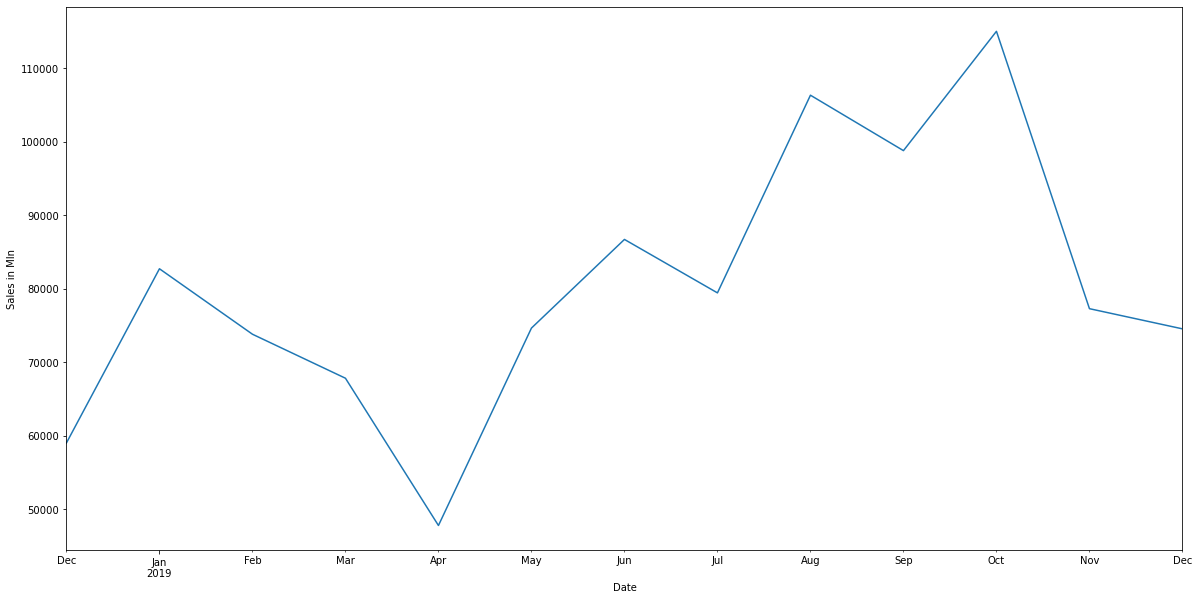

In [85]:
df_country = df_country.groupby(df_country['invoice_date'])['total_sale'].sum().reset_index()
df_country = df_country.set_index('invoice_date')
df_country.index = pd.to_datetime(df_country.index)

y = df_country['total_sale'].resample('M').mean()


y.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Sales in Mln');

In [89]:
# Pivot Table per Invoice

table_invoice = pd.pivot_table(df_country, values='total_sale', index=['InvoiceNo', 'Country'],
                    aggfunc=np.sum,
                    observed=True)

table_invoice=table_invoice.sort_values(by=['total_sale'], ascending=False)


table_invoice.sum()

total_sale    97240145.18
dtype: float64

In [91]:
# Pivot tabel per Customer

table_customer = pd.pivot_table(df_country, values='total_sale', index=['CustomerID', 'Country'],
                    aggfunc=np.sum,
                    observed=True)

table_customer=table_customer.sort_values(by=['total_sale'], ascending=False)

table_customer.head(10)

,,total_sale
CustomerID,Country,
14646,Netherlands,21664738.30
14911,Ireland,9340224.33
12415,Australia,9244349.18
14156,Ireland,5725778.94
17404,Sweden,4024405.06
12753,Japan,1532851.74
12678,France,1099427.45
12731,France,1022125.20
12471,United Kingdom,885666.30


In [57]:
# Pivot tabel per Category of Product

table_product = pd.pivot_table(df_country, values='total_sale', index=[ 'product_type'],
                    aggfunc=np.sum,
                    observed=True)

table_product=table_product.sort_values(by=['total_sale'], ascending=False)

table_product

,total_sale
product_type,
processor,2.933684e+07
dslr camera,2.132784e+07
smartphone,2.102385e+07
keyboard,1.376826e+07
monitor,6.418879e+06
mouse,5.364468e+06


In [95]:
# Which countries and which customers made the highest number of orders? Are they the same with the highest spending?


country_sales=df_country.groupby('Country')['total_sale'].agg(['sum','count','mean']).sort_values(by=['sum'], ascending=False)

country_sales.head(10)


,sum,count,mean
Country,,,
Netherlands,2.200264e+07,2448,8988.007185
Ireland,1.530354e+07,7603,2012.829133
United Kingdom,1.238764e+07,9827,1260.571785
France,1.149104e+07,8434,1362.466175
Australia,9.848729e+06,1237,7961.785756
Sweden,4.373181e+06,445,9827.373236
Japan,3.078620e+06,338,9108.343846
Spain,2.754244e+06,2551,1079.672407
Switzerland,2.730491e+06,1889,1445.468894


In [93]:
country_sales['sum'].nlargest(10).sum().round()

86444439.0

In [ ]:
#%reset